# Clustering Saham Berdasarkan Value-At Risk
Anggota Kelompok
1. Abdullah Nasih Jasir (5025211111)
2. Mohammad Ahnaf Fauzan (5025211170)
3. Al-Ferro Yudisthira Putra (5025211176)
# ---------------------------------------------------------------------------

### Import Libraries
Code di bawah guna melakukan import seluruh library yang dibutuhkan dalam final project ini

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import glob
import os
import matplotlib.dates as mdates
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# style visualisasi
plt.style.use('ggplot')
%matplotlib inline

### Import Data
Code berikut berguna untuk mengimport data dari file csv yang tersimpan di folder history

In [20]:
path = 'indonesia-stock-forecast/data/history'
all_rec = glob.iglob(path + '/*.csv', recursive=True)
count = 0

prices_df = pd.DataFrame()
for f in all_rec:
    count = count + 1
    df = pd.read_csv(f, index_col='Date', usecols=['Date', 'Close'])
    colname = os.path.basename(f).replace('.csv', '')
    df.rename(columns={'Close': colname}, inplace=True)
    prices_df = pd.concat([prices_df, df], axis=1, sort=False)

# Convert the 'Date' column to datetime format
prices_df.index = pd.to_datetime(prices_df.index)

# Define the date range
start_date = pd.to_datetime("2022-03-24")
end_date = pd.to_datetime("2023-03-24")

# Filter the data to include only the specified date range
prices_df = prices_df[(prices_df.index >= start_date) & (prices_df.index <= end_date)]

# Filter stocks with at least 100 data points within the date range
valid_stocks = prices_df.columns[prices_df.count() >= 200]

# Create a new DataFrame with the selected date range and valid stocks
prices_train = prices_df.loc[(prices_df.index >= start_date) & (prices_df.index <= end_date),valid_stocks]
prices_train = prices_train.interpolate(method='linear')
prices_train.head(10)

,AALI,ABBA,ABDA,ABMM,ACES,ACST,ADCP,ADES,ADHI,ADMF,...,WSBP,WSKT,WTON,YELO,YPAS,YULE,ZBRA,ZINC,ZONE,ZYRX
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,12008.644531,300.0,6312.328613,1534.057983,970.897583,197.0,92.533600,3630.0,740.0,7823.864746,...,95.0,570.0,220.010376,121.0,452.0,2010.0,640.0,92.0,570.497253,580.145752
2022-03-25,12225.233398,296.0,6312.328613,1492.721069,980.655396,194.0,91.549194,3630.0,735.0,7800.579102,...,95.0,550.0,214.064148,116.0,565.0,2010.0,615.0,91.0,590.340637,589.978760
2022-03-28,12465.887695,294.0,6312.328613,1538.651001,990.413147,192.0,91.549194,3660.0,740.0,7800.579102,...,95.0,555.0,214.064148,114.0,705.0,2010.0,635.0,90.0,605.223206,585.062256
2022-03-29,11888.317383,294.0,6312.328613,1543.243896,1000.170898,191.0,90.564796,3680.0,740.0,7870.435059,...,95.0,560.0,214.064148,117.0,880.0,2010.0,600.0,90.0,595.301514,555.563293
2022-03-30,11912.382812,280.0,6312.328613,1621.324707,1000.170898,191.0,90.564796,3680.0,750.0,7963.576660,...,95.0,555.0,216.046219,116.0,1020.0,2020.0,630.0,90.0,625.066589,589.978760
2022-03-31,12080.839844,286.0,6312.328613,1621.324707,1000.170898,193.0,88.596001,3680.0,740.0,7986.861816,...,95.0,550.0,216.046219,114.0,950.0,2010.0,630.0,89.0,630.027405,594.895203
2022-04-01,11840.186523,284.0,6312.328613,1635.103638,1048.959717,190.0,88.596001,3680.0,725.0,7940.291016,...,95.0,555.0,212.082077,112.0,925.0,2020.0,625.0,90.0,625.066589,589.978760
2022-04-04,12056.775391,276.0,6312.328613,1699.405518,1083.111938,190.0,88.596001,3700.0,725.0,8056.717773,...,95.0,550.0,214.064148,113.0,980.0,2020.0,625.0,91.0,649.870789,589.978760
2022-04-05,12177.102539,284.0,6312.328613,1814.230225,1048.959717,191.0,88.596001,3690.0,730.0,8103.288574,...,95.0,550.0,216.046219,121.0,920.0,2020.0,625.0,92.0,674.674988,570.312744


# ---------------------------------------------------------------------------
## **PENCARIAN VALUE AT RISK**
# ---------------------------------------------------------------------------
Untuk mendapatkan Nilai dari VaR, kita memerlukan beberapa pencaharian terlebih dahulu, yaitu
1. Expected Values
2. Mean of Expected Values
3. Standard Deviation

### Expected Values
Berikut merupakan algoritma pencarian expected values

In [21]:
# Expected Value = Value(t) - Value(t-1) / Value(t-1)
expected_df = (prices_train.diff() / prices_train.shift(1)).shift(-1)
expected_df.columns = [f'{col}' for col in expected_df.columns]
expected_df.dropna(how='all', inplace=True)
expected_df.head()

,AALI,ABBA,ABDA,ABMM,ACES,ACST,ADCP,ADES,ADHI,ADMF,...,WSBP,WSKT,WTON,YELO,YPAS,YULE,ZBRA,ZINC,ZONE,ZYRX
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,0.018036,-0.013333,0.0,-0.026946,0.010050,-0.015228,-0.010638,0.000000,-0.006757,-0.002976,...,0.0,-0.035088,-0.027027,-0.041322,0.250000,0.000000,-0.039062,-0.010870,0.034783,0.016949
2022-03-25,0.019685,-0.006757,0.0,0.030769,0.009950,-0.010309,0.000000,0.008264,0.006803,0.000000,...,0.0,0.009091,0.000000,-0.017241,0.247788,0.000000,0.032520,-0.010989,0.025210,-0.008333
2022-03-28,-0.046332,0.000000,0.0,0.002985,0.009852,-0.005208,-0.010753,0.005464,0.000000,0.008955,...,0.0,0.009009,0.000000,0.026316,0.248227,0.000000,-0.055118,0.000000,-0.016393,-0.050420
2022-03-29,0.002024,-0.047619,0.0,0.050595,0.000000,0.000000,0.000000,0.000000,0.013514,0.011834,...,0.0,-0.008929,0.009259,-0.008547,0.159091,0.004975,0.050000,0.000000,0.050000,0.061947
2022-03-30,0.014141,0.021429,0.0,0.000000,0.000000,0.010471,-0.021739,0.000000,-0.013333,0.002924,...,0.0,-0.009009,0.000000,-0.017241,-0.068627,-0.004950,0.000000,-0.011111,0.007936,0.008333


### Mean Expected Value
berikut merupakan pencarian dari mean expected values

In [22]:
# Calculate the mean (expected value) for each column in expected_df
expected_means = expected_df.mean()
expected_means.head()

AALI   -0.001456
ABBA   -0.003784
ABDA    0.000232
ABMM    0.002756
ACES   -0.002467
dtype: float64

### Standard Deviation
berikut merupakan pencarian dari standard deviation

In [23]:
# Calculate the standard deviation of daily returns for each stock
std_deviation = expected_df.std()
std_deviation.head()

AALI    0.016869
ABBA    0.036859
ABDA    0.016515
ABMM    0.035742
ACES    0.026903
dtype: float64

### Value at Risk
Dengan memanfaatkan hasil dari pencarian di atas, kita mampu menemukan nilai value-at-risk sebagaimana ditunjukkan dibawah

In [24]:
# Calculate Value at Risk
value_at_risk = std_deviation.copy()
value_at_risk = -(expected_means + std_deviation*0.01)
value_at_risk.head(10)

AALI    0.001287
ABBA    0.003416
ABDA   -0.000397
ABMM   -0.003114
ACES    0.002198
ACST    0.001195
ADCP    0.001187
ADES   -0.003144
ADHI    0.001817
ADMF   -0.001069
dtype: float64

# ---------------------------------------------------------------------------
# **CLUSTERING**
# ---------------------------------------------------------------------------
Setelah mendapatkan nilai VaR, kita akan melakukan clustering. Terdapat beberapa metode clustering yang digunakan, yaitu,
1. K-Means Algorithm
2. Agglomerative Algorithm
3. Gaussian Mixture Model (GMM) Algorithm
# ---------------------------------------------------------------------------

### **K-Means Algorithm**
Code berikut berguna untuk melakukan clustering menggunakan metode K-Means

In [25]:
# Standardize the data
scaler_kmeans = StandardScaler()
var_data_standardized_kmeans = scaler_kmeans.fit_transform(np.array(value_at_risk).reshape(-1, 1))

K = 8

# Perform K-means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
clusters_kmeans = kmeans.fit_predict(var_data_standardized_kmeans)
clusters_kmeans = clusters_kmeans + 1

# Display the resulting clusters
result_df_kmeans = pd.DataFrame({'VaR': value_at_risk, 'Cluster': clusters_kmeans})
print(result_df_kmeans)

           VaR  Cluster
AALI  0.001287        2
ABBA  0.003416        3
ABDA -0.000397        2
ABMM -0.003114        8
ACES  0.002198        3
...        ...      ...
YULE -0.000383        2
ZBRA  0.000780        2
ZINC  0.002137        3
ZONE -0.003628        7
ZYRX  0.002277        3

[782 rows x 2 columns]


C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Pin Point Graph of Every Stocks Based On K-Means Algorithm
Code berikut berguna untuk menunjukkan gambaran peta persebaran stock berdasarkan Expected Values dan VaR nya

C:\Users\Abdullah NJ\AppData\Local\Temp\ipykernel_14948\295680440.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_clusters)


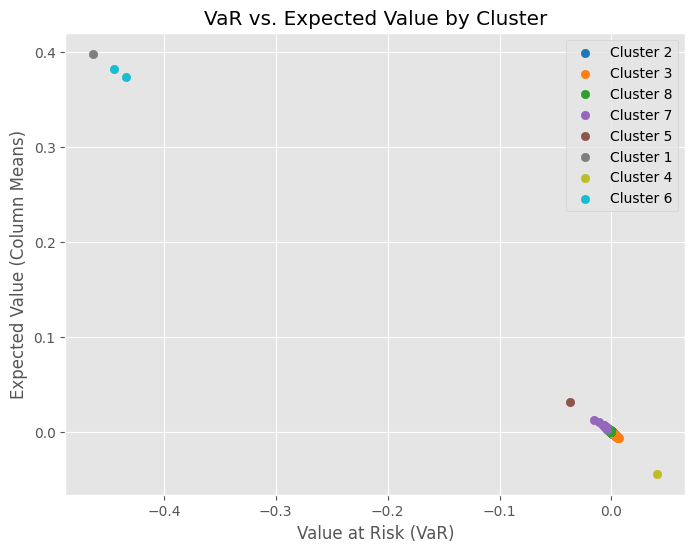

In [26]:
# Plotting the graph for each cluster with a consistent color palette
plt.figure(figsize=(8, 6))
num_clusters = result_df_kmeans['Cluster'].nunique()
color_palette = plt.cm.get_cmap('tab10', num_clusters) 

for i, cluster in enumerate(result_df_kmeans['Cluster'].unique()):
    cluster_data_kmeans = result_df_kmeans[result_df_kmeans['Cluster'] == cluster]
    plt.scatter(
        cluster_data_kmeans['VaR'],
        expected_means[cluster_data_kmeans.index],
        color=color_palette(i),
        label=f'Cluster {cluster}'  # Menggunakan warna dari palet berdasarkan indeks cluster
    )

plt.title('VaR vs. Expected Value by Cluster')
plt.xlabel('Value at Risk (VaR)')
plt.ylabel('Expected Value (Column Means)')
plt.legend()
plt.grid(True)
plt.show()

### Random 25 Stock Each Cluster
Untuk melihat detail persebaran lebih jelas, maka kita akan memilih 25 stock sebagai contoh

In [27]:
result_df_kmeans['Stocks'] = result_df_kmeans.index

# Fungsi untuk memilih tepat 25 nama saham acak per cluster jika tersedia
def select_random_stocks_per_cluster(df):
    return df.groupby('Cluster').apply(lambda x: x.sample(n=25) if len(x) >= 25 else x).reset_index(drop=True)

# Membuat DataFrame baru dengan maksimal 25 nama saham acak per cluster atau semua jika kurang dari 25
newstockslist_kmeans = select_random_stocks_per_cluster(result_df_kmeans)
print(newstockslist_kmeans)

          VaR  Cluster Stocks
0   -0.462867        1   MYOR
1    0.000416        2   FASW
2    0.001264        2   WGSH
3   -0.000000        2   TDPM
4    0.000780        2   ZBRA
..        ...      ...    ...
100 -0.000660        8   POWR
101 -0.000775        8   ARNA
102 -0.002024        8   DUTI
103 -0.001936        8   PANS
104 -0.000931        8   IFSH

[105 rows x 3 columns]


### Pin Point Clusters K-Means of The Selected Stocks
Code di bawah melakukan penunjukan data dari 25 saham per cluster yang telah terpilih

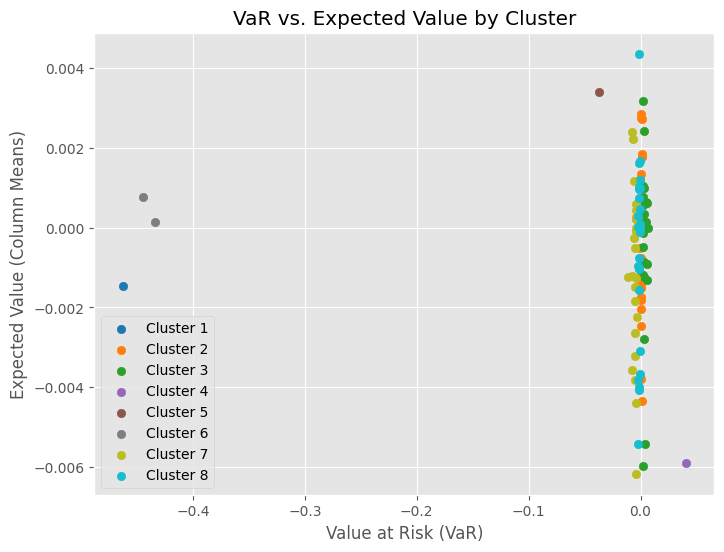

In [28]:
newclusters_kmeans = newstockslist_kmeans['Cluster'].unique()
num_clusters = len(newclusters_kmeans)

# Menggunakan palet warna berurutan dari Matplotlib
color_palette = plt.cm.tab10(np.linspace(0, 1, num_clusters))

# Plotting the graph for each cluster with a consistent color palette
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(newclusters_kmeans):
    cluster_data_kmeans = newstockslist_kmeans[newstockslist_kmeans['Cluster'] == cluster]
    plt.scatter(
        cluster_data_kmeans['VaR'],
        expected_means[cluster_data_kmeans.index],
        color=color_palette[i],  # Menggunakan warna dari palet berdasarkan indeks cluster
        label=f'Cluster {cluster}'
    )

plt.title('VaR vs. Expected Value by Cluster')
plt.xlabel('Value at Risk (VaR)')
plt.ylabel('Expected Value (Column Means)')
plt.legend()
plt.grid(True)
plt.show()

### Test Clustering Each Stock

In [29]:
stock_name = "BBCA"
cluster_series = result_df_kmeans.loc[stock_name, 'Cluster'] if stock_name in result_df_kmeans.index else None

if cluster_series is not None:
    cluster = cluster_series
    print(f"The stock {stock_name} is in Cluster {cluster}\n")
    
    # Temukan saham-saham lain dalam cluster yang sama
    same_cluster_stocks_kmeans = result_df_kmeans[result_df_kmeans['Cluster'] == cluster]

    # Cetak saham-saham dalam cluster yang sama
    print(f"Other stocks in Cluster {cluster}:")
    print(same_cluster_stocks_kmeans.head(5))
else:
    print(f"The stock {stock_name} was not found in any cluster")

The stock BBCA is in Cluster 8

Other stocks in Cluster 8:
           VaR  Cluster Stocks
ABMM -0.003114        8   ABMM
ADES -0.003144        8   ADES
ADMF -0.001069        8   ADMF
ADRO -0.000763        8   ADRO
AGII -0.002159        8   AGII


# ---------------------------------------------------------------------------

### **Agglomerative Algorithm**
Code di bawah berguna untuk melakukan clustering berdasarkan Algoritma Agglomerative 

In [30]:
# Standardize the data
scaler_aglo = StandardScaler()
var_data_standardized_aglo = scaler_aglo.fit_transform(np.array(value_at_risk).reshape(-1, 1))

K = 8

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=K)
clusters_aglo = agg_cluster.fit_predict(var_data_standardized_aglo)
clusters_aglo = clusters_aglo + 1

# Display the resulting clusters
result_df_aglo = pd.DataFrame({'VaR': value_at_risk, 'Cluster': clusters_aglo})
print(result_df_aglo)

           VaR  Cluster
AALI  0.001287        1
ABBA  0.003416        7
ABDA -0.000397        3
ABMM -0.003114        2
ACES  0.002198        1
...        ...      ...
YULE -0.000383        3
ZBRA  0.000780        1
ZINC  0.002137        1
ZONE -0.003628        2
ZYRX  0.002277        1

[782 rows x 2 columns]


### Bar Plot Every Stocks Cluster Agglomerative
Code di bawah berguna untuk memvisualisasikan data persebaran berdasarkan Expected Values dan VaR dari algoritma Agglomerative

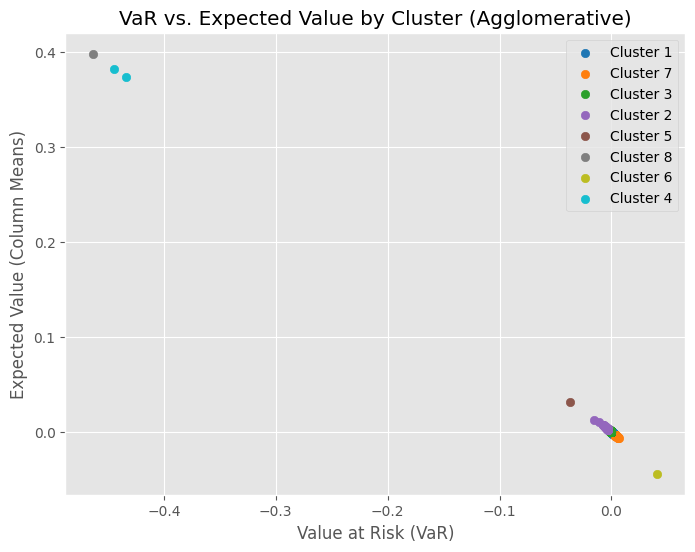

In [31]:
# Mengambil jumlah cluster yang unik
num_clusters_aglo = result_df_aglo['Cluster'].nunique()

# Menggunakan palet warna berurutan dari Matplotlib
color_palette_aglo = plt.cm.tab10(np.linspace(0, 1, num_clusters_aglo))

# Plotting the graph for each cluster with a consistent color palette
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(result_df_aglo['Cluster'].unique()):
    cluster_data_aglo = result_df_aglo[result_df_aglo['Cluster'] == cluster]
    plt.scatter(
        cluster_data_aglo['VaR'],
        expected_means[cluster_data_aglo.index],
        color=color_palette_aglo[i],  # Menggunakan warna dari palet berdasarkan indeks cluster
        label=f'Cluster {cluster}'
    )

plt.title('VaR vs. Expected Value by Cluster (Agglomerative)')
plt.xlabel('Value at Risk (VaR)')
plt.ylabel('Expected Value (Column Means)')
plt.legend()
plt.grid(True)
plt.show()

### Random 25 Stock Each Cluster
Untuk melihat data lebih jelas, maka diambil 25 stock per cluster untuk di visualisasikan

In [32]:
result_df_aglo['Stocks'] = result_df_aglo.index

# Fungsi untuk memilih tepat 25 nama saham acak per cluster jika tersedia
def select_random_stocks_per_cluster(df):
    return df.groupby('Cluster').apply(lambda x: x.sample(n=25) if len(x) >= 25 else x).reset_index(drop=True)

# Membuat DataFrame baru dengan maksimal 25 nama saham acak per cluster atau semua jika kurang dari 10
new_stocks_list_aglo = select_random_stocks_per_cluster(result_df_aglo)
print(new_stocks_list_aglo)

          VaR  Cluster Stocks
0    0.001127        1   MSIN
1    0.000064        1   GOOD
2    0.000066        1   GMTD
3    0.001379        1   SLIS
4    0.000271        1   OILS
..        ...      ...    ...
100  0.003290        7   PSDN
101  0.003245        7   IATA
102  0.003949        7   PCAR
103  0.003291        7   WMUU
104 -0.462867        8   MYOR

[105 rows x 3 columns]


### Pin Point Clusters Agglomerative of The Selected Stocks
Code di bawah melakukan penunjukan data dari 25 saham per cluster yang telah terpilih

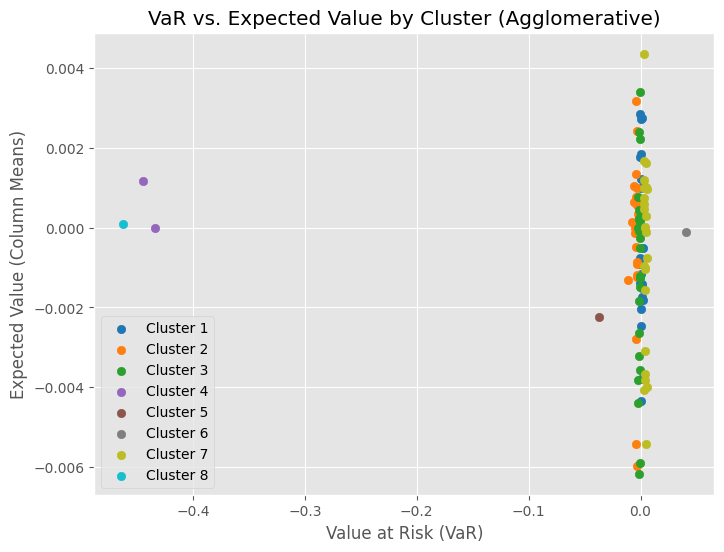

In [33]:
newclusters_aglo = new_stocks_list_aglo['Cluster'].unique()
num_clusters_aglo = len(newclusters_aglo)

# Menggunakan palet warna berurutan dari Matplotlib
color_palette_aglo = plt.cm.tab10(np.linspace(0, 1, num_clusters_aglo))

# Plotting the graph for each cluster with a consistent color palette
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(newclusters_aglo):
    cluster_data_aglo = new_stocks_list_aglo[new_stocks_list_aglo['Cluster'] == cluster]
    plt.scatter(
        cluster_data_aglo['VaR'],
        expected_means[cluster_data_aglo.index],
        color=color_palette_aglo[i],  # Menggunakan warna dari palet berdasarkan indeks cluster
        label=f'Cluster {cluster}'
    )

plt.title('VaR vs. Expected Value by Cluster (Agglomerative)')
plt.xlabel('Value at Risk (VaR)')
plt.ylabel('Expected Value (Column Means)')
plt.legend()
plt.grid(True)
plt.show()

### Test Clustering Each Stock

In [34]:
stock_name = "BBCA"
cluster_series_aglo = result_df_aglo.loc[stock_name, 'Cluster'] if stock_name in result_df_aglo.index else None

if cluster_series_aglo is not None:
    cluster_aglo = cluster_series_aglo
    print(f"The stock {stock_name} is in Cluster {cluster_aglo}\n")
    
    # Temukan saham-saham lain dalam cluster yang sama
    same_cluster_stocks_aglo = result_df_aglo[result_df_aglo['Cluster'] == cluster_aglo]

    # Cetak saham-saham dalam cluster yang sama
    print(f"Other stocks in Cluster {cluster_aglo}:")
    print(same_cluster_stocks_aglo.head(5))
else:
    print(f"The stock {stock_name} was not found in any cluster")

The stock BBCA is in Cluster 3

Other stocks in Cluster 3:
           VaR  Cluster Stocks
ABDA -0.000397        3   ABDA
ADMF -0.001069        3   ADMF
ADRO -0.000763        3   ADRO
AGII -0.002159        3   AGII
AHAP -0.000524        3   AHAP


# ---------------------------------------------------------------------------

### **GMM Algorithm**
Code dibawah berguna untuk melakukan implementasi dari algoritma GMM dalam melakukan Clustering

In [35]:


# Standardize the data
scaler_gmm = StandardScaler()
var_data_standardized_gmm = scaler_gmm.fit_transform(np.array(value_at_risk).reshape(-1, 1))

K_gmm = 8

# Perform GMM Clustering
gmm_cluster = GaussianMixture(n_components=K_gmm, random_state=42)
clusters_gmm = gmm_cluster.fit_predict(var_data_standardized_gmm)
clusters_gmm = clusters_gmm + 1

# Display the resulting clusters
result_df_gmm = pd.DataFrame({'VaR': value_at_risk, 'Cluster': clusters_gmm})
print(result_df_gmm)


           VaR  Cluster
AALI  0.001287        1
ABBA  0.003416        8
ABDA -0.000397        3
ABMM -0.003114        7
ACES  0.002198        1
...        ...      ...
YULE -0.000383        3
ZBRA  0.000780        3
ZINC  0.002137        1
ZONE -0.003628        7
ZYRX  0.002277        1

[782 rows x 2 columns]


### Bar Plot Every Stocks Cluster GMM
Berikut merupakan Visualisasi seluruh stock berdasarkan Expected Values dan VaR dari Algoritma GMM

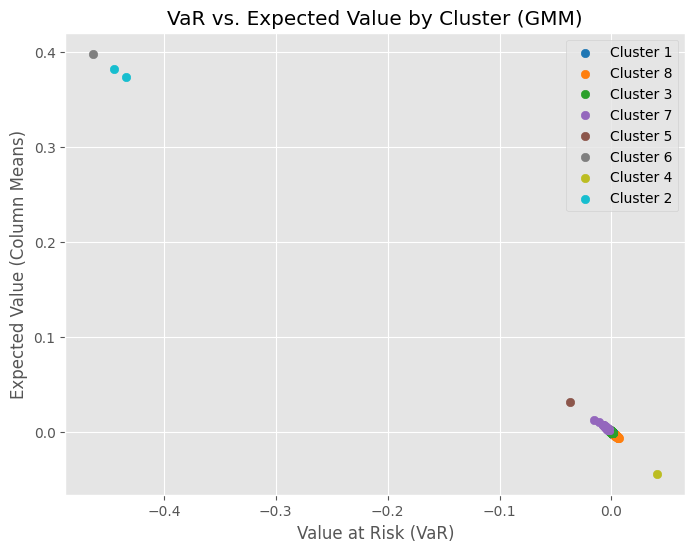

In [36]:
# Define colors for each cluster
num_clusters_gmm = len(result_df_gmm['Cluster'].unique())
color_palette_gmm = plt.cm.tab10(np.linspace(0, 1, num_clusters_gmm))

# Plotting the graph for each cluster with a consistent color palette
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(result_df_gmm['Cluster'].unique()):
    cluster_data_gmm = result_df_gmm[result_df_gmm['Cluster'] == cluster]
    plt.scatter(
        cluster_data_gmm['VaR'],
        expected_means[cluster_data_gmm.index],
        color=color_palette_gmm[i],  # Menggunakan warna dari palet berdasarkan indeks cluster
        label=f'Cluster {cluster}'
    )

plt.title('VaR vs. Expected Value by Cluster (GMM)')
plt.xlabel('Value at Risk (VaR)')
plt.ylabel('Expected Value (Column Means)')
plt.legend()
plt.grid(True)
plt.show()

### Random 25 Stock Each Cluster
Untuk melihat data lebih jelas, maka diambil 25 stock per cluster untuk di visualisasikan

In [37]:
result_df_gmm['Stocks'] = result_df_gmm.index

# Fungsi untuk memilih tepat 25 nama saham acak per cluster jika tersedia
def select_random_stocks_per_cluster(df):
    return df.groupby('Cluster').apply(lambda x: x.sample(n=25) if len(x) >= 25 else x).reset_index(drop=True)

# Membuat DataFrame baru dengan maksimal 25 nama saham acak per cluster atau semua jika kurang dari 10
newstockslist_gmm = select_random_stocks_per_cluster(result_df_gmm)
print(newstockslist_gmm)

          VaR  Cluster Stocks
0    0.001029        1   KIJA
1    0.001810        1   TINS
2    0.002102        1   ESTI
3    0.001523        1   SAPX
4    0.001316        1   AKSI
..        ...      ...    ...
100  0.004902        8   URBN
101  0.003551        8   BGTG
102  0.002670        8   MOLI
103  0.005207        8   CMPP
104  0.004229        8   MARI

[105 rows x 3 columns]


### Pin Point Clusters GMM of The Selected Stocks
Code di bawah melakukan penunjukan data dari 25 saham per cluster yang telah terpilih

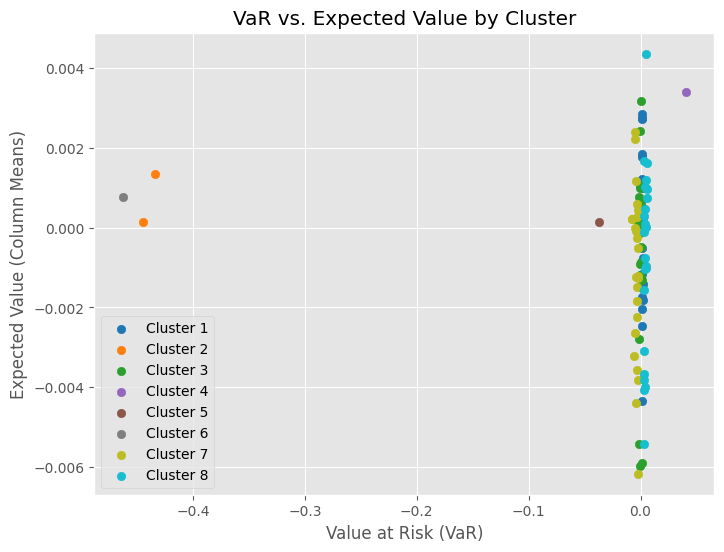

In [38]:
newclusters_gmm = newstockslist_gmm['Cluster'].unique()
num_clusters_gmm = len(newclusters_gmm)

# Menggunakan palet warna berurutan dari Matplotlib
color_palette_gmm = plt.cm.tab10(np.linspace(0, 1, num_clusters_gmm))

# Plotting the graph for each cluster with a consistent color palette
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(newclusters_gmm):
    cluster_data_gmm = newstockslist_gmm[newstockslist_gmm['Cluster'] == cluster]
    plt.scatter(
        cluster_data_gmm['VaR'],
        expected_means[cluster_data_gmm.index],
        color=color_palette_gmm[i],  # Menggunakan warna dari palet berdasarkan indeks cluster
        label=f'Cluster {cluster}'
    )

plt.title('VaR vs. Expected Value by Cluster')
plt.xlabel('Value at Risk (VaR)')
plt.ylabel('Expected Value (Column Means)')
plt.legend()
plt.grid(True)
plt.show()

### Test Clustering Each Stock

In [39]:
stock_name = "BBCA"
cluster_series_gmm = result_df_gmm.loc[stock_name, 'Cluster'] if stock_name in result_df_gmm.index else None

if cluster_series_gmm is not None:
    cluster_gmm = cluster_series_gmm
    print(f"The stock {stock_name} is in Cluster {cluster_gmm}\n")
    
    # Temukan saham-saham lain dalam cluster yang sama
    same_cluster_stocks_gmm = result_df_gmm[result_df_gmm['Cluster'] == cluster_gmm]

    # Cetak saham-saham dalam cluster yang sama
    print(f"Other stocks in Cluster {cluster_gmm}:")
    print(same_cluster_stocks_gmm.head(5))
else:
    print(f"The stock {stock_name} was not found in any cluster")

The stock BBCA is in Cluster 3

Other stocks in Cluster 3:
           VaR  Cluster Stocks
ABDA -0.000397        3   ABDA
ADMF -0.001069        3   ADMF
ADRO -0.000763        3   ADRO
AGAR  0.000429        3   AGAR
AGII -0.002159        3   AGII


# ---------------------------------------------------------------------------
# COMPARISON
# ---------------------------------------------------------------------------

### Mean VaR of Clusters Analysis Based On Algorithm
Untuk mengetahui persamaan cluster dari setiap algoritma, maka perlu dilakukannya analisis berdasarkan mean VaR dari setiap clusternya

### K-Means Algorithm
Berikut merupakan visualisasi dari Mean VaR algoritma K-Means

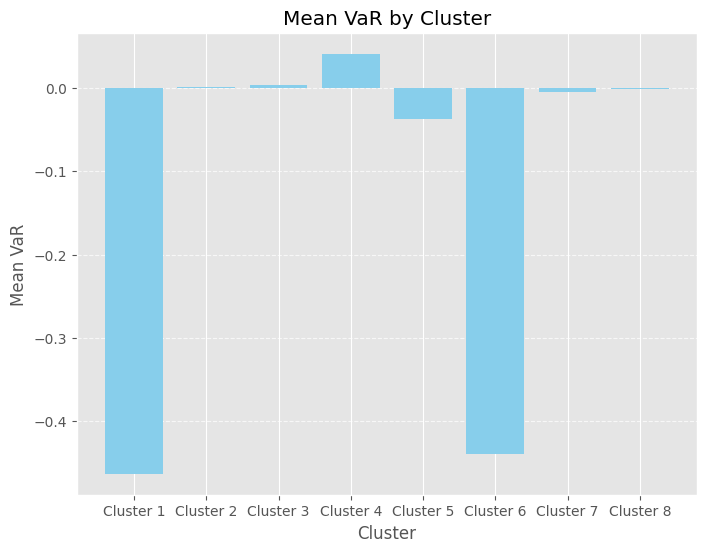

In [40]:
grouped_df_kmeans = result_df_kmeans.groupby('Cluster')['VaR'].mean().reset_index()
cluster_labels = [f'Cluster {label}' for label in grouped_df_kmeans['Cluster']]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, grouped_df_kmeans['VaR'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean VaR')
plt.title('Mean VaR by Cluster')
plt.xticks(cluster_labels)  # Menggunakan label yang baru
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Agglomerative Algorithm
Berikut merupakan visualisasi dari Mean VaR algoritma Aggloemerative

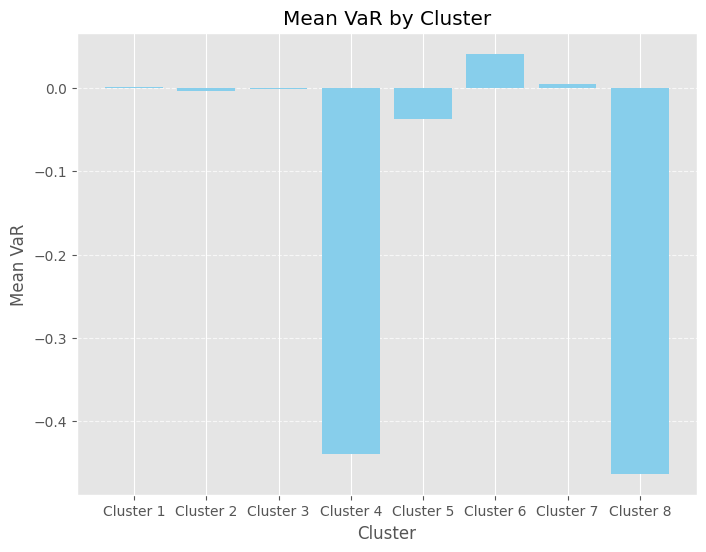

In [41]:
grouped_df_aglo = result_df_aglo.groupby('Cluster')['VaR'].mean().reset_index()
cluster_labels_aglo = [f'Cluster {label}' for label in grouped_df_aglo['Cluster']]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels_aglo, grouped_df_aglo['VaR'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean VaR')
plt.title('Mean VaR by Cluster')
plt.xticks(cluster_labels_aglo)  # Menggunakan label yang baru
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### GMM Algorithm
Berikut merupakan visualisasi dari Mean VaR algoritma GMM

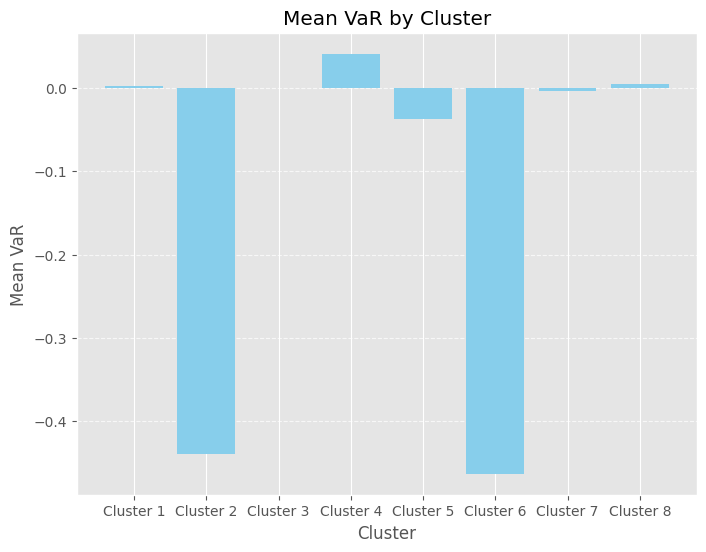

In [42]:
grouped_df_gmm = result_df_gmm.groupby('Cluster')['VaR'].mean().reset_index()
cluster_labels_gmm = [f'Cluster {label}' for label in grouped_df_gmm['Cluster']]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels_gmm, grouped_df_gmm['VaR'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean VaR')
plt.title('Mean VaR by Cluster')
plt.xticks(cluster_labels_gmm)  # Menggunakan label yang baru
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Perbandingan 3 Algoritma
Berikut adalah grafik perbandingan Mean VaR pada setiap cluster

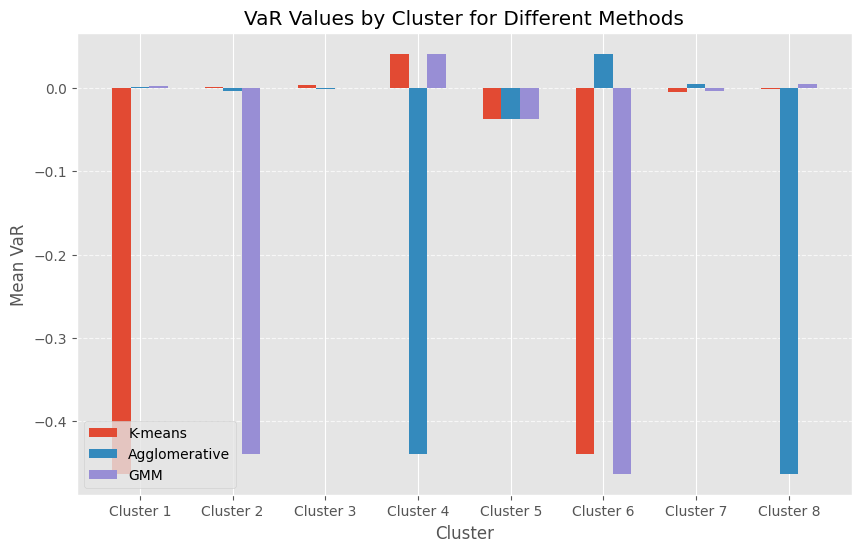

In [43]:
bar_width = 0.2

# Mengatur posisi cluster pada sumbu x
x_clusters = np.arange(len(grouped_df_kmeans))

plt.figure(figsize=(10, 6))

# Bar plot untuk K-means
plt.bar(x_clusters - bar_width, grouped_df_kmeans['VaR'], width=bar_width, label='K-means')

# Bar plot untuk Agglomerative clustering
plt.bar(x_clusters, grouped_df_aglo['VaR'], width=bar_width, label='Agglomerative')

# Bar plot untuk GMM
plt.bar(x_clusters + bar_width, grouped_df_gmm['VaR'], width=bar_width, label='GMM')

# Set labels dan title
plt.xlabel('Cluster')
plt.ylabel('Mean VaR')
plt.title('VaR Values by Cluster for Different Methods')
plt.xticks(x_clusters, [f'Cluster {label}' for label in grouped_df_gmm['Cluster']])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


#### Note
Urutan Klaster dalam Clustering Tidak Mencerminkan Urutan Risiko yang Konsisten
Ketika melakukan proses clustering untuk mengelompokkan saham berdasarkan tingkat risiko, penting untuk dipahami bahwa urutan klaster tidak selalu menjamin urutan risiko yang konsisten. Setiap klaster hanya menunjukkan kesamaan dalam karakteristik risiko di dalamnya, namun tidak memastikan bahwa urutan klaster tersebut mengindikasikan tingkat risiko yang berurutan.

### Cluster Sorting Based On The Mean VaR
Guna menyamakan nama cluster sesuai dengan karakteristiknya, maka perlu dilakukannya pengurutan cluster berdasarkan nilai Mean VaR nya

In [44]:
def get_cluster_summary(df, algorithm_name):
    # Extract numeric columns
    numeric_columns = df.select_dtypes(include='number')
    
    # Calculate mean values for each cluster
    cluster_means = numeric_columns.groupby('Cluster').mean()['VaR']
    
    # Explicitly sort the mean values
    cluster_means_sorted = cluster_means.sort_values()
    
    # Create a DataFrame with mean values and cluster counts
    summary = pd.DataFrame({
        f'Mean VaR': cluster_means_sorted,
        f'Counts': df['Cluster'].value_counts().reindex(cluster_means_sorted.index)
    })
    
    return summary

# Get cluster summaries for each algorithm
kmeans_summary = get_cluster_summary(result_df_kmeans, 'K-Means')
aglo_summary = get_cluster_summary(result_df_aglo, 'Agglomerative')
gmm_summary = get_cluster_summary(result_df_gmm, 'GMM')

# Display the individual summaries
print("K-Means Cluster Summary:")
print(kmeans_summary)

print("\nAgglomerative Cluster Summary:")
print(aglo_summary)

print("\nGMM Cluster Summary:")
print(gmm_summary)

K-Means Cluster Summary:
         Mean VaR  Counts
Cluster                  
1       -0.462867       1
6       -0.439187       2
5       -0.037331       1
7       -0.005376      36
8       -0.001569     208
2        0.000310     421
3        0.003272     112
4        0.040807       1

Agglomerative Cluster Summary:
         Mean VaR  Counts
Cluster                  
8       -0.462867       1
4       -0.439187       2
5       -0.037331       1
2       -0.004333      64
3       -0.001091     251
1        0.000653     395
7        0.004032      67
6        0.040807       1

GMM Cluster Summary:
         Mean VaR  Counts
Cluster                  
6       -0.462867       1
2       -0.439187       2
5       -0.037331       1
7       -0.003938      80
3       -0.000339     510
1        0.001606     118
8        0.003993      69
4        0.040807       1


### Change of Cluster Order based On The Sorted Mean VaR
Dengan data yang di dapatkan, maka kita akan melakukan perubahan nama cluster untuk menyesuaikan ketiga algoritma

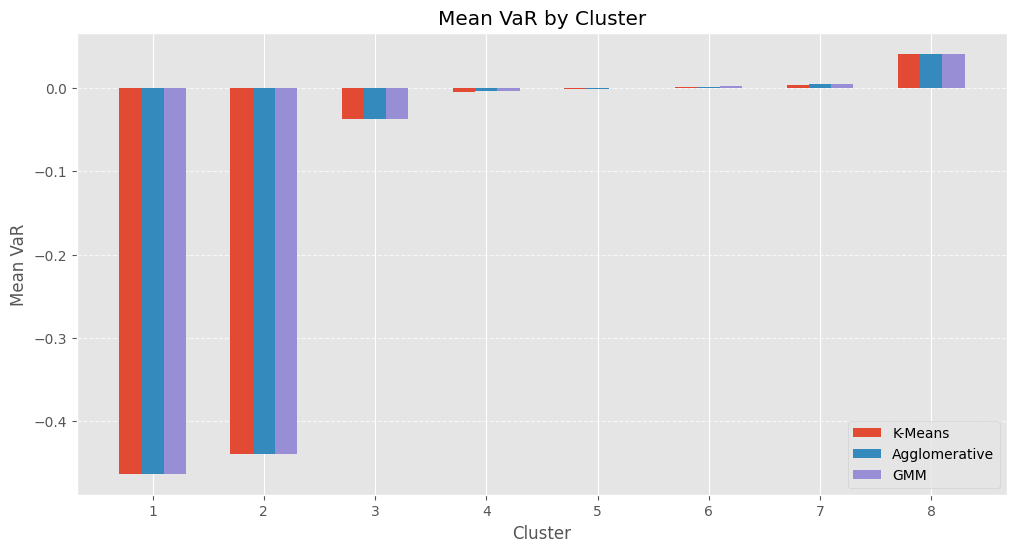

In [45]:
# Buat salinan DataFrame tanpa mengubah yang asli
dfs = [result_df_kmeans, result_df_aglo, result_df_gmm]
new_dfs = [df.copy() for df in dfs]

# Tentukan pola penggantian nilai
clusters = [kmeans_summary, aglo_summary, gmm_summary]

# Lakukan penggantian nilai sesuai pola yang disebutkan
for i, df in enumerate(new_dfs):
    df['Cluster'] = df['Cluster'].replace({clusters[i].index[j]: j+1 for j in range(8)})

# Simpan hasilnya kembali ke variabel yang awalnya dibuat
newresult_df_kmeans, newresult_df_aglo, newresult_df_gmm = new_dfs

# Plotting mean VaR for each cluster and algorithm after reassigning clusters
def get_cluster_summary(df, algorithm_name):
    numeric_columns = df.select_dtypes(include='number')
    cluster_means = numeric_columns.groupby('Cluster').mean()['VaR']
    cluster_means_sorted = cluster_means.sort_values()
    summary = pd.DataFrame({
        f'Mean VaR': cluster_means_sorted,
        f'Counts': df['Cluster'].value_counts().reindex(cluster_means_sorted.index)
    })
    return summary

# Get cluster summaries for each algorithm after reassigning clusters
new_kmeans_summary = get_cluster_summary(newresult_df_kmeans, 'K-Means')
new_aglo_summary = get_cluster_summary(newresult_df_aglo, 'Agglomerative')
new_gmm_summary = get_cluster_summary(newresult_df_gmm, 'GMM')

# Plot bar plot for mean VaR by cluster and algorithm after reassigning clusters
plt.figure(figsize=(12, 6))

bar_width = 0.2
x_kmeans = np.arange(len(new_kmeans_summary))
x_aglo = np.arange(len(new_aglo_summary)) + bar_width
x_gmm = np.arange(len(new_gmm_summary)) + 2 * bar_width

plt.bar(x_kmeans, new_kmeans_summary['Mean VaR'], width=bar_width, label='K-Means')
plt.bar(x_aglo, new_aglo_summary['Mean VaR'], width=bar_width, label='Agglomerative')
plt.bar(x_gmm, new_gmm_summary['Mean VaR'], width=bar_width, label='GMM')

plt.xlabel('Cluster')
plt.ylabel('Mean VaR')
plt.title('Mean VaR by Cluster')
plt.xticks(np.arange(len(new_gmm_summary)) + bar_width, new_gmm_summary.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Comparison of The Number of Stocks in Every Cluster
Berikut merupakan gambaran dari jumlah stocks di tiap Cluster

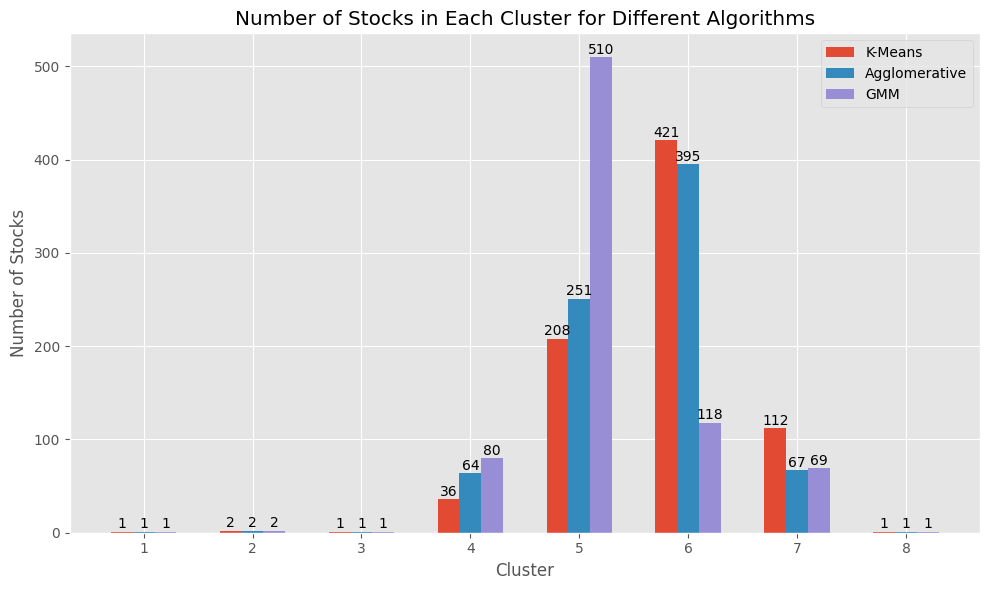

In [46]:
# Count the number of stocks in each cluster for each DataFrame
kmeans_cluster_counts = newresult_df_kmeans['Cluster'].value_counts().sort_index()
aglo_cluster_counts = newresult_df_aglo['Cluster'].value_counts().sort_index()
gmm_cluster_counts = newresult_df_gmm['Cluster'].value_counts().sort_index()

# Create a bar plot to compare the number of stocks in each cluster for each algorithm
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = kmeans_cluster_counts.index  # Assuming clusters are the same across all DataFrames

plt.bar(index - bar_width, kmeans_cluster_counts, width=bar_width, label='K-Means')
plt.bar(index, aglo_cluster_counts, width=bar_width, label='Agglomerative')
plt.bar(index + bar_width, gmm_cluster_counts, width=bar_width, label='GMM')

# Displaying count values on top of each bar
for i, v in enumerate(kmeans_cluster_counts):
    plt.text(i + 1 - bar_width, v + 0.5, str(v), ha='center', va='bottom')
for i, v in enumerate(aglo_cluster_counts):
    plt.text(i+1, v + 0.5, str(v), ha='center', va='bottom')
for i, v in enumerate(gmm_cluster_counts):
    plt.text(i + 1 + bar_width, v + 0.5, str(v), ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks in Each Cluster for Different Algorithms')
plt.xticks(index)
plt.legend()
plt.tight_layout()
plt.show()


### Stock Cluster 1
Berikut merupakan data Stock yang berada pada cluster 1 di setiap algoritma

In [47]:
# Memilih saham dengan cluster 1 dari setiap algoritma
stocks_kmeans_cluster1 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 1]['Stocks']
stocks_aglo_cluster1 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 1]['Stocks']
stocks_gmm_cluster1 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 1]['Stocks']

# Menemukan saham yang memiliki cluster 1 di ketiga algoritma
stocks_in_clusters1 = set(stocks_kmeans_cluster1) & set(stocks_aglo_cluster1) & set(stocks_gmm_cluster1)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 1 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters1))

Stock berikut memiliki cluster 1 di ketiga algoritma:
'MYOR'


### Stock Cluster 2
Berikut merupakan data Stock yang berada pada cluster 2 di setiap algoritma

In [48]:
# Memilih saham dengan cluster 2 dari setiap algoritma
stocks_kmeans_cluster2 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 2]['Stocks']
stocks_aglo_cluster2 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 2]['Stocks']
stocks_gmm_cluster2 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 2]['Stocks']

# Menemukan saham yang memiliki cluster 2 di ketiga algoritma
stocks_in_clusters2 = set(stocks_kmeans_cluster2) & set(stocks_aglo_cluster2) & set(stocks_gmm_cluster2)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 2 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters2))

Stock berikut memiliki cluster 2 di ketiga algoritma:
'SRAJ', 'SIDO'


### Stock Cluster 3
Berikut merupakan data Stock yang berada pada cluster 3 di setiap algoritma

In [49]:
# Memilih saham dengan cluster 3 dari setiap algoritma
stocks_kmeans_cluster3 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 3]['Stocks']
stocks_aglo_cluster3 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 3]['Stocks']
stocks_gmm_cluster3 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 3]['Stocks']

# Menemukan saham yang memiliki cluster 3 di ketiga algoritma
stocks_in_clusters3 = set(stocks_kmeans_cluster3) & set(stocks_aglo_cluster3) & set(stocks_gmm_cluster3)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 3 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters3))

Stock berikut memiliki cluster 3 di ketiga algoritma:
'EXCL'


### Stock Cluster 4
Berikut merupakan data Stock yang berada pada cluster 4 di setiap algoritma

In [50]:
# Memilih saham dengan cluster 4 dari setiap algoritma
stocks_kmeans_cluster4 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 4]['Stocks']
stocks_aglo_cluster4 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 4]['Stocks']
stocks_gmm_cluster4 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 4]['Stocks']

# Menemukan saham yang memiliki cluster 4 di ketiga algoritma
stocks_in_clusters4 = set(stocks_kmeans_cluster4) & set(stocks_aglo_cluster4) & set(stocks_gmm_cluster4)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 4 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters4))

Stock berikut memiliki cluster 4 di ketiga algoritma:
'IBOS', 'TMAS', 'NZIA', 'SINI', 'SMKM', 'ETWA', 'RAJA', 'BMSR', 'NICL', 'PANR', 'RISE', 'MPRO', 'PTIS', 'OASA', 'ZONE', 'SKRN', 'GLVA', 'SDPC', 'OKAS', 'OBMD', 'BELL', 'PNLF', 'BYAN', 'LTLS', 'SULI', 'YPAS', 'LION', 'PANI', 'BUMI', 'CAKK', 'MRAT', 'PICO', 'ASBI', 'LUCY', 'FMII', 'SNLK'


### Stock Cluster 5
Berikut merupakan data Stock yang berada pada cluster 5 di setiap algoritma

In [51]:
# Memilih saham dengan cluster 5 dari setiap algoritma
stocks_kmeans_cluster5 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 5]['Stocks']
stocks_aglo_cluster5 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 5]['Stocks']
stocks_gmm_cluster5 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 5]['Stocks']

# Menemukan saham yang memiliki cluster 5 di ketiga algoritma
stocks_in_clusters5 = set(stocks_kmeans_cluster5) & set(stocks_aglo_cluster5) & set(stocks_gmm_cluster5)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 5 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters5))

Stock berikut memiliki cluster 5 di ketiga algoritma:
'PUDP', 'CASS', 'ISAT', 'WOMF', 'AGII', 'TEBE', 'APLN', 'ICBP', 'INTA', 'MTLA', 'PLIN', 'SAFE', 'SMSM', 'CAMP', 'MFIN', 'PANS', 'CMRY', 'OMRE', 'FAPA', 'SHID', 'ARTA', 'BATA', 'POWR', 'INRU', 'SOTS', 'DUTI', 'NRCA', 'FIMP', 'BMAS', 'KBLM', 'PMJS', 'BPII', 'BBLD', 'IPAC', 'DSNG', 'SMDM', 'PGLI', 'SILO', 'MKPI', 'HEAL', 'META', 'BEST', 'SCNP', 'CITA', 'GDST', 'SOSS', 'INTD', 'STAA', 'BMTR', 'KBLI', 'GOLD', 'TPMA', 'ENZO', 'MERK', 'SFAN', 'ASHA', 'IPCC', 'PSSI', 'BFIN', 'IFII', 'MREI', 'BTON', 'CEKA', 'BNGA', 'DEWA', 'KLBF', 'LEAD', 'TOTO', 'PTPW', 'DRMA', 'MINA', 'ADRO', 'ROTI', 'AMFG', 'TURI', 'DYAN', 'MIKA', 'NIRO', 'DNET', 'TFAS', 'MPMX', 'HOPE', 'APII', 'AKPI', 'AMAG', 'PGJO', 'MLIA', 'TRUS', 'NISP', 'KEEN', 'AIMS', 'TOTL', 'IMPC', 'MTSM', 'BBRM', 'CLEO', 'SMAR', 'BBSS', 'MASA', 'UNVR', 'BMRI', 'PJAA', 'VOKS', 'RUIS', 'SDMU', 'HMSP', 'MYTX', 'LPLI', 'TAYS', 'PTBA', 'BBCA', 'TCID', 'HDFA', 'BIRD', 'WAPO', 'STTP', 'GPRA', 'KDSI', 'T

### Stock Cluster 6
Berikut merupakan data Stock yang berada pada cluster 6 di setiap algoritma

In [52]:
# Memilih saham dengan cluster 6 dari setiap algoritma
stocks_kmeans_cluster6 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 6]['Stocks']
stocks_aglo_cluster6 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 6]['Stocks']
stocks_gmm_cluster6 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 6]['Stocks']

# Menemukan saham yang memiliki cluster 6 di ketiga algoritma
stocks_in_clusters6 = set(stocks_kmeans_cluster6) & set(stocks_aglo_cluster6) & set(stocks_gmm_cluster6)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 6 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters6))

Stock berikut memiliki cluster 6 di ketiga algoritma:
'AALI', 'FILM', 'ATIC', 'IKAN', 'SATU', 'IMJS', 'BTPS', 'ADMG', 'SAPX', 'AGRS', 'LABA', 'ICON', 'LMPI', 'BANK', 'UVCR', 'PPRE', 'TRJA', 'CSIS', 'MLPT', 'BNLI', 'PEHA', 'MARK', 'BBSI', 'DIVA', 'KPIG', 'SAME', 'SLIS', 'TIRT', 'PTPP', 'TRIN', 'ADMR', 'GGRP', 'PEGE', 'SOFA', 'INDX', 'TRIM', 'ISSP', 'KIJA', 'NPGF', 'INPC', 'PAMG', 'BKSW', 'MNCN', 'PRAS', 'MAIN', 'NATO', 'PURE', 'SMRA', 'GEMA', 'AMOR', 'ACST', 'BVIC', 'POLY', 'BAJA', 'FORU', 'AKSI', 'SMBR', 'CLAY', 'DART', 'BSML', 'ADCP', 'VINS', 'LPCK', 'MSIN', 'JAWA', 'PSKT', 'HOKI', 'CPRO', 'WGSH', 'PNSE', 'ANJT', 'WMPP', 'CTBN', 'PTDU', 'WEHA'


### Stock Cluster 7
Berikut merupakan data Stock yang berada pada cluster 7 di setiap algoritma

In [53]:
# Memilih saham dengan cluster 7 dari setiap algoritma
stocks_kmeans_cluster7 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 7]['Stocks']
stocks_aglo_cluster7 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 7]['Stocks']
stocks_gmm_cluster7 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 7]['Stocks']

# Menemukan saham yang memiliki cluster 7 di ketiga algoritma
stocks_in_clusters7 = set(stocks_kmeans_cluster7) & set(stocks_aglo_cluster7) & set(stocks_gmm_cluster7)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 7 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters7))

Stock berikut memiliki cluster 7 di ketiga algoritma:
'MPPA', 'EMTK', 'KJEN', 'ARTO', 'BBYB', 'KIOS', 'DFAM', 'IATA', 'ASLC', 'ASMI', 'GIAA', 'CMPP', 'INPS', 'IPPE', 'KARW', 'OLIV', 'IPTV', 'TOYS', 'MLPL', 'NASI', 'FIRE', 'UFOE', 'BCAP', 'MARI', 'PCAR', 'WMUU', 'BGTG', 'TELE', 'WIFI', 'PRIM', 'BBHI', 'CENT', 'PTSP', 'GOTO', 'LUCK', 'URBN', 'ASSA', 'CASH', 'TNCA', 'ALTO', 'NICK', 'ABBA', 'MGLV', 'MSKY', 'WSKT', 'KBLV', 'TECH', 'POLL', 'SEMA', 'NANO', 'BIMA', 'SGER', 'ECII', 'AGRO', 'BNBA', 'FUJI', 'BESS', 'BBKP', 'AYLS', 'PSDN', 'BOLA', 'HOMI', 'HDIT', 'INAF', 'ATAP', 'JAST', 'APEX'


### Stock Cluster 8
Berikut merupakan data Stock yang berada pada cluster 8 di setiap algoritma

In [54]:
# Memilih saham dengan cluster 8 dari setiap algoritma
stocks_kmeans_cluster8 = newresult_df_kmeans[newresult_df_kmeans['Cluster'] == 8]['Stocks']
stocks_aglo_cluster8 = newresult_df_aglo[newresult_df_aglo['Cluster'] == 8]['Stocks']
stocks_gmm_cluster8 = newresult_df_gmm[newresult_df_gmm['Cluster'] == 8]['Stocks']

# Menemukan saham yang memiliki cluster 8 di ketiga algoritma
stocks_in_clusters8 = set(stocks_kmeans_cluster8) & set(stocks_aglo_cluster8) & set(stocks_gmm_cluster8)

# Memeriksa jika saham memiliki cluster yang sama di semua algoritma
print("Stock berikut memiliki cluster 8 di ketiga algoritma:")
print(', '.join(f"'{stock}'" for stock in stocks_in_clusters8))

Stock berikut memiliki cluster 8 di ketiga algoritma:
'SCPI'


# ---------------------------------------------------------------------------
## Features
# ---------------------------------------------------------------------------

### Note
1. Nilai VaR Mendekati -1:

Jika nilai VaR mendekati -1, itu menunjukkan bahwa kemungkinan kerugian besar dalam periode tertentu relatif tinggi. Pada level kepercayaan tertentu (misalnya, 95% atau 99%), ada kemungkinan tinggi bahwa kerugian besar akan terjadi. Ini menandakan risiko signifikan terkait investasi tersebut, dengan potensi kerugian yang lebih besar pada periode tertentu. Bagi investor yang menyukai risiko tinggi, nilai mendekati -1 pada VaR mungkin dianggap sebagai kesempatan untuk mendapatkan keuntungan besar, namun juga membawa risiko kerugian besar.

2. Nilai VaR Mendekati 1:

Ketika nilai VaR mendekati 1, itu menunjukkan bahwa risiko investasi relatif lebih rendah. Ini menandakan kemungkinan kerugian besar dalam periode tertentu cenderung lebih rendah. Pada level kepercayaan tertentu, risiko kerugian besar juga relatif lebih rendah. Bagi sebagian investor yang ingin menghindari risiko tinggi, mendekati nilai 1 pada VaR mungkin dianggap sebagai perlindungan terhadap kerugian besar, meskipun juga dapat membatasi potensi keuntungan.

### Merging All The Clusters Into One Data Frame
Code dibawah berguna untuk melakukan penyatuan seluruh cluster kedalam satu dataframe

In [55]:
# Menggabungkan ketiga DataFrame berdasarkan kolom 'Stock' dan 'Cluster'
finalresult_df = pd.merge(newresult_df_kmeans, newresult_df_aglo, on=['VaR', 'Stocks', 'Cluster'])
finalresult_df = pd.merge(finalresult_df, newresult_df_gmm, on=['VaR', 'Stocks', 'Cluster'])

print(finalresult_df)


          VaR  Cluster Stocks
0    0.001287        6   AALI
1    0.003416        7   ABBA
2    0.001195        6   ACST
3    0.001187        6   ADCP
4   -0.001069        5   ADMF
..        ...      ...    ...
342  0.003291        7   WMUU
343 -0.001402        5   WOMF
344  0.002889        7   WSKT
345 -0.003674        4   YPAS
346 -0.003628        4   ZONE

[347 rows x 3 columns]


### Feature 1
#### Testing a specific Stock to where it falls in cluster while also recommending some stocks that fall in the same cluster.

The stock BBCA is in Cluster 5
Cluster 5: Investasi dalam klaster ini menunjukkan tingkat risiko yang terbilang cukup terkendali.
Potensi fluktuasi nilai yang sedikit dapat dikendali dengan risiko kerugian atau keuntungan yang sedang.
5 saham dengan nilai VaR tertinggi di Cluster 5:
          VaR Stocks  Cluster
102 -0.000653   DLTA        5
254 -0.000660   POWR        5
310 -0.000662   TAYS        5
71  -0.000663   BRIS        5
183 -0.000671   LCKM        5



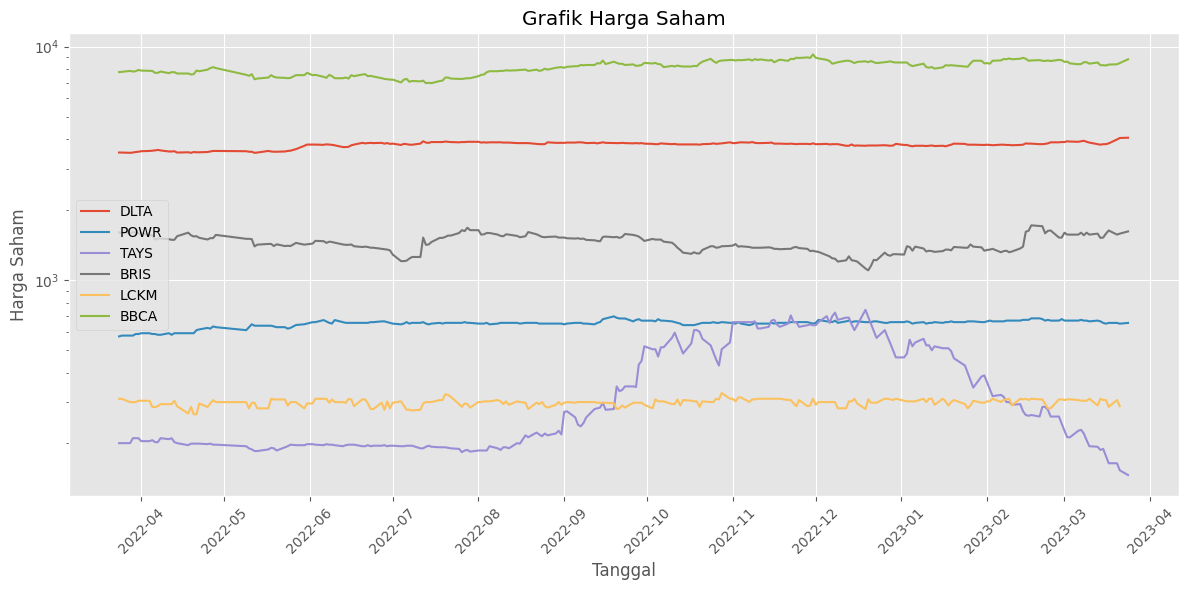

In [62]:
stock_name = "BBCA"
cluster_final = finalresult_df[finalresult_df.Stocks == stock_name]['Cluster']

if not cluster_final.empty:
    clusters_found = cluster_final.unique()
    for cluster in clusters_found:
        if stock_name in finalresult_df[finalresult_df['Cluster'] == cluster]['Stocks'].values:
            print(f"The stock {stock_name} is in Cluster {cluster}")

        if cluster == 1:
            print(f"Cluster {cluster}: Investasi dalam klaster ini memiliki risiko yang ekstrem.\nPotensi fluktuasi nilai yang ekstrem dengan risiko kerugian atau keuntungan yang ekstrem.")
        elif cluster == 2:
            print(f"Cluster {cluster}: Investasi dalam klaster ini memiliki risiko yang sangat tinggi.\nPotensi fluktuasi nilai yang sangat besar dengan risiko kerugian atau keuntungan yang sangat tinggi.")
        elif cluster == 3:
            print(f"Cluster {cluster}: Investasi dalam klaster ini memiliki risiko yang tinggi.\nPotensi fluktuasi nilai yang besar dengan risiko kerugian atau keuntungan yang tinggi.")
        elif cluster == 4:
            print(f"Cluster {cluster}: Investasi dalam klaster ini menunjukkan tingkat risiko yang terbilang cukup tinggi.\nPotensi fluktuasi nilai yang besar dengan risiko kerugian atau keuntungan yang besar.")
        elif cluster == 5:
            print(f"Cluster {cluster}: Investasi dalam klaster ini menunjukkan tingkat risiko yang terbilang cukup terkendali.\nPotensi fluktuasi nilai yang sedikit dapat dikendali dengan risiko kerugian atau keuntungan yang sedang.")
        elif cluster == 6:
            print(f"Cluster {cluster}: Investasi dalam klaster ini cenderung memiliki risiko yang relatif terkendali.\nPotensi fluktuasi nilai yang masih dapat diantisipasi, dengan risiko kerugian atau keuntungan yang moderat dalam jangka waktu tertentu.")
        elif cluster == 7:
            print(f"Cluster {cluster}: Investasi dalam klaster ini menunjukkan tingkat risiko yang moderat.\nPotensi fluktuasi nilai yang tidak besar dengan risiko kerugian atau keuntungan yang relatif kecil.")
        elif cluster == 8:
            print(f"Cluster {cluster}: Investasi dalam klaster ini memiliki nilai VaR paling rendah.\nPotensi kerugian atau keuntungan relatif stabil dalam jangka waktu tertentu")
        
        # Filter DataFrame berdasarkan cluster tertentu
        same_cluster_final = finalresult_df[finalresult_df['Cluster'] == cluster]

        # Mengurutkan berdasarkan nilai VaR (dari tertinggi ke terendah)
        sorted_cluster = same_cluster_final.sort_values(by='VaR', ascending=False)

        # Mengambil 5 saham dengan nilai VaR tertinggi
        top_5_highest_var = sorted_cluster.head(5)

        # Menampilkan kolom VaR, Stocks, dan Cluster dari 5 saham dengan nilai VaR terendah
        print(f"5 saham dengan nilai VaR tertinggi di Cluster {cluster}:")
        print(top_5_highest_var[['VaR', 'Stocks', 'Cluster']])     
        print()
   
    # Jika tidak ada
    else:
        cluster = clusters_found[0]

else:
    print(f"The stock {stock_name} was not found in any cluster")

# Ambil tanggal dan nama saham yang dipilih dari top_5_lowest_var
additional_stocksfix = top_5_highest_var['Stocks'].tolist()

# Tambahkan nama saham yang dipilih ke dalam list saham yang akan digambarkan
stocks_to_plot = additional_stocksfix + [stock_name]

# Filter DataFrame untuk saham-saham yang akan digambarkan
selected_stocks = prices_df[stocks_to_plot]

# Membuat grafik
plt.figure(figsize=(12, 6))

# Plot harga penutupan saham yang dipilih
for stock in stocks_to_plot:
    plt.semilogy(selected_stocks.index, selected_stocks[stock], label=stock)

plt.title('Grafik Harga Saham')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)

# Format tanggal di sumbu X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)  # Rotasi label tanggal untuk penampilan yang lebih baik
plt.tight_layout()  # Menata tata letak plot agar rapih
plt.show()


### Feature 2
#### Giving some stocks recommendation depending on the cluster risk level.

In [57]:
# Memilih tingkat risiko
tingkat_resiko = "Resiko Sangat Rendah"  # Ganti dengan input yang sesuai

# Dictionary untuk pemetaan tingkat risiko ke cluster
tingkat_resiko_to_cluster = {
    "Resiko Ekstream": 1,
    "Resiko Sangat Tinggi": 2,
    "Resiko Tinggi": 3,
    "Resiko Sedang Tinggi": 4,
    "Resiko Sedang Rendah": 5,
    "Resiko Rendah": 6,
    "Resiko Sangat Rendah": 7,
    "Resiko Moderat": 8
}

# Memeriksa apakah tingkat risiko valid
if tingkat_resiko in tingkat_resiko_to_cluster:
    cluster = tingkat_resiko_to_cluster[tingkat_resiko]
    emiten_cluster = finalresult_df[finalresult_df['Cluster'] == cluster]['Stocks']
    
    if not emiten_cluster.empty:
        if len(emiten_cluster) < 10:
            print(f"Rekomendasi emiten untuk tingkat {tingkat_resiko}:")
            for emiten in emiten_cluster:
                print(emiten)
        else:
            emiten_rekomendasi = random.sample(emiten_cluster.tolist(), k=10)
            print(f"Rekomendasi 10 emiten untuk tingkat '{tingkat_resiko}':")
            for emiten in emiten_rekomendasi:
                print(emiten)
    else:
        print(f"Tidak ada emiten untuk tingkat '{tingkat_resiko}'")
else:
    print("Tingkat risiko tidak valid")


Rekomendasi 10 emiten untuk tingkat 'Resiko Sangat Rendah':
NANO
MSKY
TECH
MPPA
IATA
WMUU
BNBA
LUCK
OLIV
PSDN


# ---------------------------------------------------------------------------
## EVALUATION
# ---------------------------------------------------------------------------


### Silhouette Score

In [58]:
from sklearn.metrics import silhouette_score

# Ambil hasil clustering dari ketiga algoritma
test1_clusters_kmeans = result_df_kmeans['Cluster']  # Hasil clustering dari K-Means
test1_clusters_gmm = result_df_gmm['Cluster']   # Hasil clustering dari OPTICS
test1_clusters_aglo = result_df_aglo['Cluster']   # Hasil clustering dari Hierarchical Clustering atau Agglomerative Clustering

# Hitung silhouette score untuk setiap hasil clustering
silhouette_kmeans = silhouette_score(var_data_standardized_kmeans, test1_clusters_kmeans)
silhouette_gmm = silhouette_score(var_data_standardized_gmm, test1_clusters_gmm)
silhouette_aglo = silhouette_score(var_data_standardized_aglo, test1_clusters_aglo)

# Tampilkan hasil
print(f"Silhouette Score K-Means: {silhouette_kmeans}")
print(f"Silhouette Score GMM: {silhouette_gmm}")
print(f"Silhouette Score Agglomerative Clustering: {silhouette_aglo}")

Silhouette Score K-Means: 0.5382688510025878
Silhouette Score GMM: 0.5069706585090419
Silhouette Score Agglomerative Clustering: 0.4967712585630244


C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 

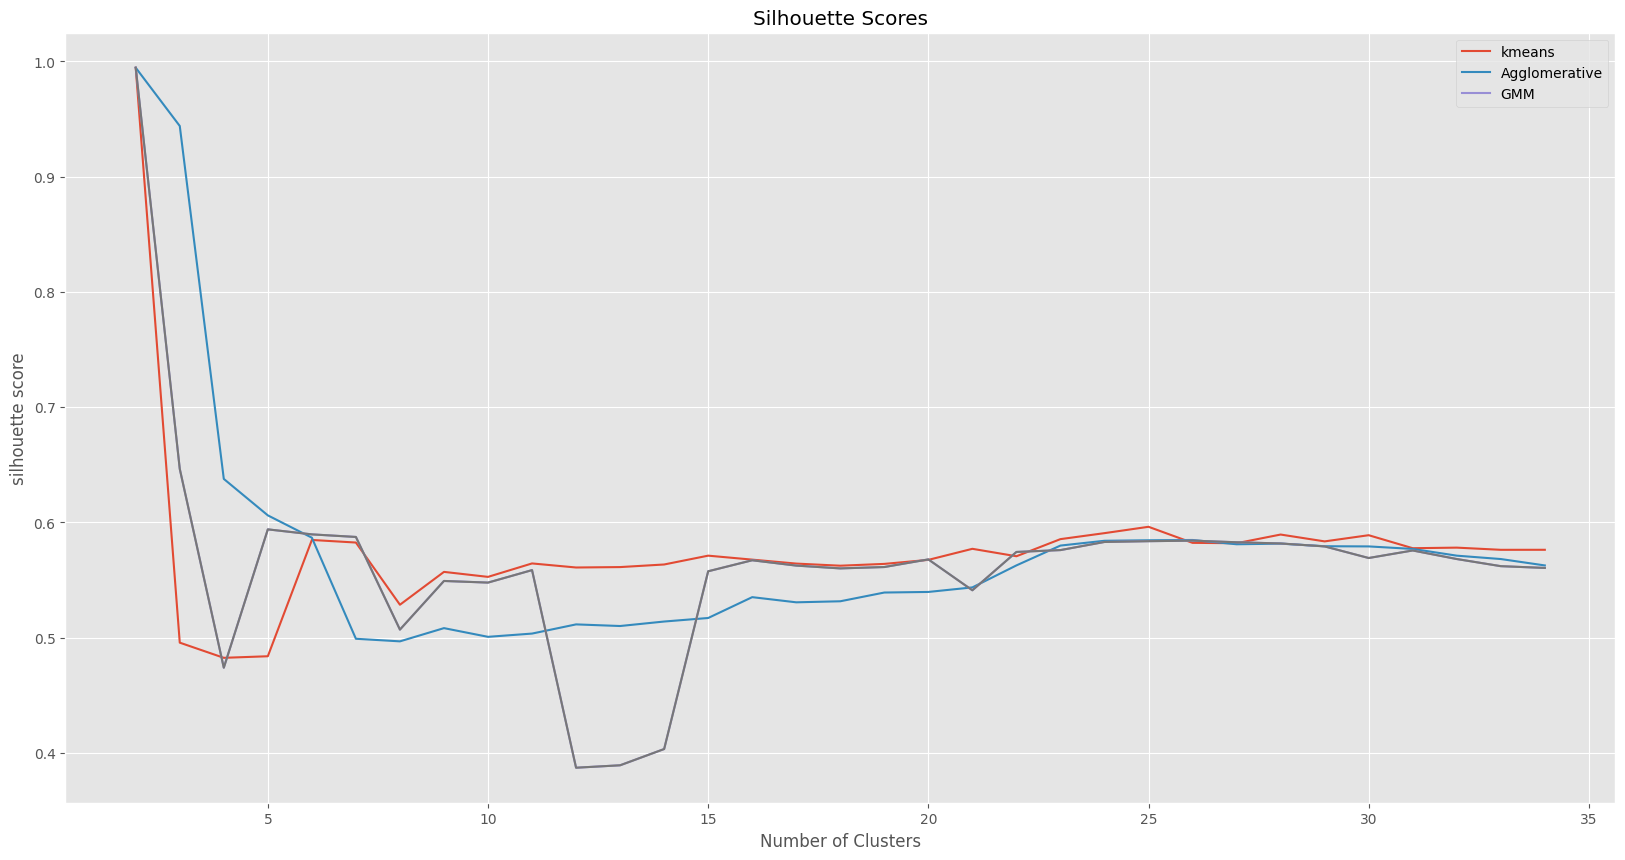

In [59]:
clusters=range(2,35,1)

# Compute the silhouette score for K means cluster with different k's and plot
scores = []
for k in clusters:
    km = KMeans(n_clusters=k,random_state=0)
    labels = km.fit_predict(var_data_standardized_kmeans)
    score = silhouette_score(var_data_standardized_kmeans,labels)
    scores.append(score)


plt.figure(figsize=(20,10))
plt.plot(clusters,scores)

# Compute the silhouette score for Agglomerative cluster with 'linkage = average' with different n_cluster's and plot
scores = []
for k in clusters:
    ag = AgglomerativeClustering(n_clusters=k)
    labels = ag.fit_predict(var_data_standardized_aglo)
    score = silhouette_score(var_data_standardized_aglo,labels)
    scores.append(score)

plt.plot(clusters,scores)

scores = []
for k in clusters:
    gm =GaussianMixture(n_components=k, random_state=42)
    labels = gm.fit_predict(var_data_standardized_gmm)
    score = silhouette_score(var_data_standardized_gmm,labels)
    scores.append(score)

plt.plot(clusters,scores)

plt.plot(clusters,scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.legend(['kmeans','Agglomerative','GMM'])

### Davies-Bouldin Index

In [60]:
from sklearn.metrics import davies_bouldin_score

# Hitung Davies-Bouldin Index untuk setiap hasil clustering
db_index_kmeans = davies_bouldin_score(var_data_standardized_kmeans, test1_clusters_kmeans)
db_index_gmm = davies_bouldin_score(var_data_standardized_gmm, test1_clusters_gmm)
db_index_aglo = davies_bouldin_score(var_data_standardized_aglo, test1_clusters_aglo)

# Tampilkan hasil
print(f"Davies-Bouldin Index K-Means: {db_index_kmeans}")
print(f"Davies-Bouldin Index GMM: {db_index_gmm}")
print(f"Davies-Bouldin Index Agglomerative Clustering: {db_index_aglo}")


Davies-Bouldin Index K-Means: 0.3438114017937388
Davies-Bouldin Index GMM: 0.325752457709972
Davies-Bouldin Index Agglomerative Clustering: 0.35138317061832197


C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdullah NJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 

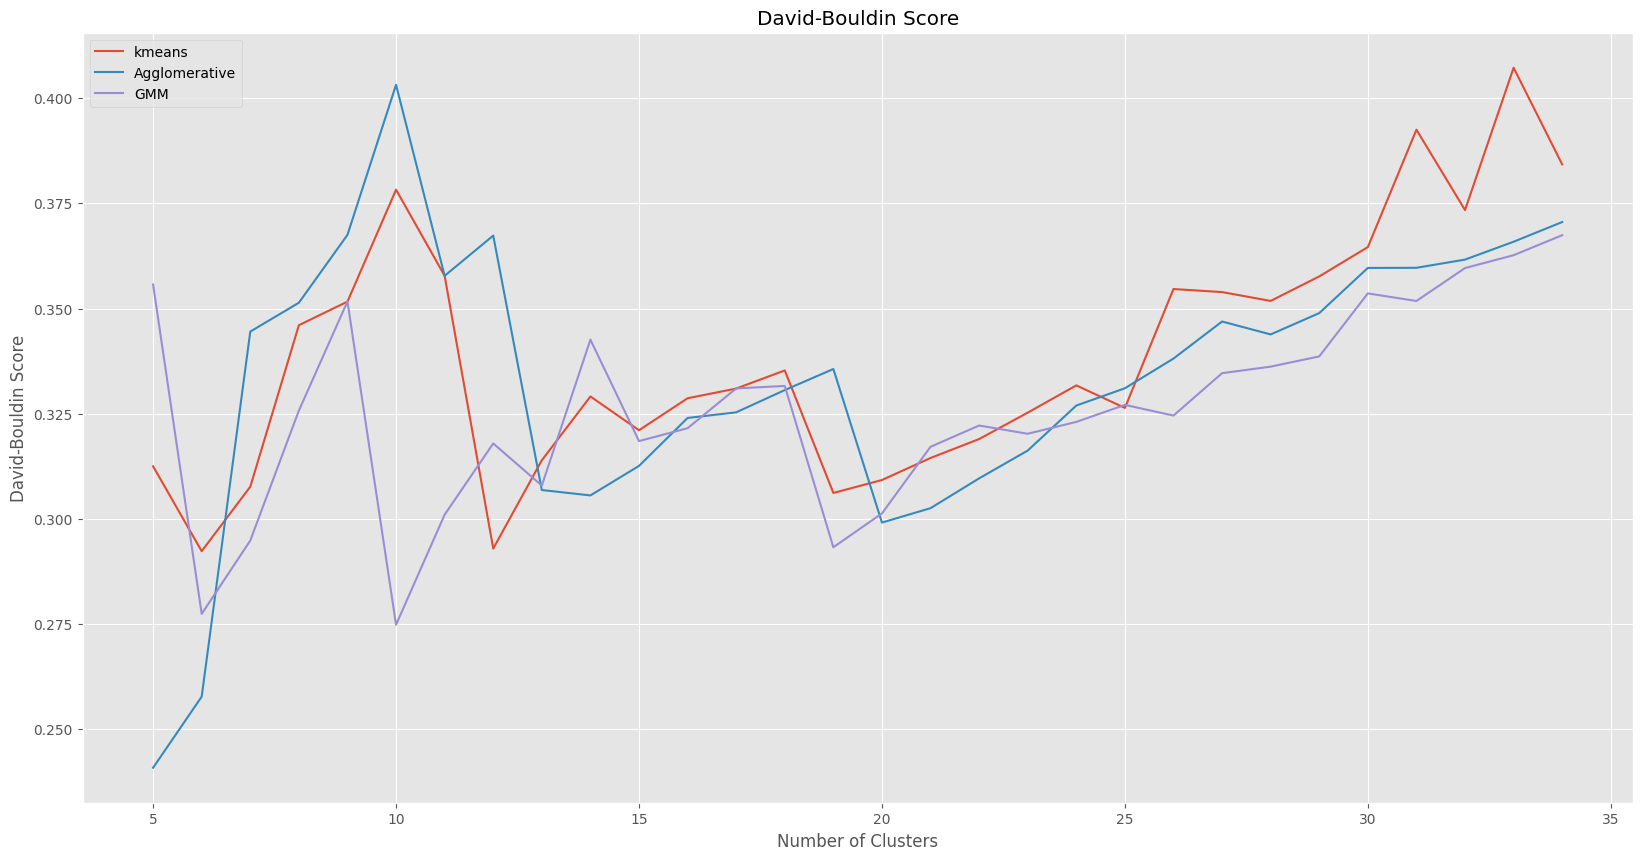

In [61]:
clusters=range(5,35,1)

# Compute the silhouette score for K means cluster with different k's and plot
scores_dbi = []
for k in clusters:
    km = KMeans(n_clusters=k,random_state=0)
    labels = km.fit_predict(var_data_standardized_kmeans)
    score = davies_bouldin_score(var_data_standardized_kmeans,labels)
    scores_dbi.append(score)


plt.figure(figsize=(20,10))
plt.plot(clusters,scores_dbi)

# Compute the silhouette score for Agglomerative cluster with 'linkage = average' with different n_cluster's and plot
scores_dbi = []
for k in clusters:
    ag = AgglomerativeClustering(n_clusters=k)
    labels = ag.fit_predict(var_data_standardized_aglo)
    score = davies_bouldin_score(var_data_standardized_aglo,labels)
    scores_dbi.append(score)

plt.plot(clusters,scores_dbi)

scores_dbi = []
for k in clusters:
    gm =GaussianMixture(n_components=k, random_state=42)
    labels = gm.fit_predict(var_data_standardized_gmm)
    score = davies_bouldin_score(var_data_standardized_gmm,labels)
    scores_dbi.append(score)

plt.plot(clusters,scores_dbi)

plt.title('David-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('David-Bouldin Score')
plt.legend(['kmeans','Agglomerative','GMM'])

### Kesipulan

Jadi, kesimpulan utamanya adalah bahwa dari dua metrik evaluasi yang digunakan, yaitu Silhouette Score dan Davies-Bouldin Index (DBI), KMeans menunjukkan hasil yang lebih baik. Meskipun GMM memiliki nilai DBI yang lebih baik, keunggulan KMeans terletak pada interpretasi yang lebih sederhana dan jelas dari hasil clustering-nya. Dengan grafik yang stabil dan nilai Silhouette Score yang tinggi, KMeans terbukti memberikan cluster yang konsisten dan terpisah dengan baik. Jadi, berdasarkan evaluasi yang telah dilakukan, KMeans menjadi pilihan terbaik dalam memahami pola cluster.